In [210]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npl
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
#%matplotlib tk
import operator
import pandas as pd
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

In [2]:
def count_net_pos(line):
    return None

In [415]:
def generate_update_hours():
    update_hours = dict()
    canvas = np.zeros((1001,1001))
    start_time = 1490918688
    seconds_in_hour = 3600
    with open("/scratch/yw180/place/data/sorted_tile_placements_idx.csv", "r") as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        next(reader)
        for line in reader:
            update = int(line[0])
            time = int(line[1][:-3])
#             curr_time = math.floor((time - start_time) / seconds_in_hour)
            x = int(line[3])
            y = int(line[4])
            prev_update = canvas[y,x]
            if prev_update != 0:
                update_hours[prev_update].append(time)
            update_hours[update] = [time]
            canvas[y,x] = update
#     end_time = 1491238734
    for x in range(0, 1001):
        for y in range(0, 1001):
            update = canvas[y,x]
            if update != 0:
                update_hours[update].append(-1)
    return update_hours

In [419]:
def convert_time(time):
    start_time = 1490918688
    seconds_in_hour = 3600
    return math.floor((time - start_time) / seconds_in_hour)

In [416]:
update_hours = generate_update_hours()

In [460]:
update_hours_h[1000000]

[23, 23]

In [455]:
update_hours_h = dict()
for key in update_hours:
    st = convert_time(update_hours[key][0])
    ed = update_hours[key][1]
    if ed != -1:
        ed = convert_time(update_hours[key][1])
    update_hours_h[key] = [st,ed]

In [138]:
def get_diff_over_time(line, update_hours, update_pos):
    total_hours = 89
    count_lst = np.zeros(total_hours)
    count_dict = dict()
    size = pixels_per_project(line,update_pos)
    for update in line:
        update = int(update)
        st = update_hours[update][0]
        en = update_hours[update][1]
        if en != -1:
            count_lst[st] += 1
            count_lst[en] += -1
        else:
            count_lst[st] += 1
    for i in range(0, len(count_lst)):
        count_dict[i] = count_lst[i]
    return count_dict

In [34]:
def pixels_per_project(line, update_pos):
    pos_set = set()
    for item in line:
        item = int(item)
        pos_set.add(update_pos[item])
    return len(pos_set)

In [139]:
def make_update_pos():
    update_pos = dict()
    with open("/scratch/yw180/place/data/sorted_tile_placements_idx.csv", "r") as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for line in reader:
            update = int(line[0])
            x = int(line[3])
            y = int(line[4])
            update_pos[update] = (x,y)
    return update_pos
update_pos = make_update_pos()

In [440]:
def make_drawing_update(line, update_pos):
    out = dict()
    for update in line:
        update = int(update)
        pos = update_pos[update]
        if pos not in out:
            out[pos] = set()
        out[pos].add(update)
    return out

In [314]:

import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
def plot_time_pos(diff_over_time_dict_list, face_red, face_blue, line_red, line_blue):
    rows = len(diff_over_time_dict_list)
    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(rows, 2, width_ratios=[4, 1], wspace=0.15)

    for idx in range(len(diff_over_time_dict_list)):
        diff_over_time_dict = diff_over_time_dict_list[idx]
        x = list(diff_over_time_dict.keys())
        y = list(diff_over_time_dict.values())
        ax = fig.add_subplot(gs[idx, 0])

        for i in range(1, len(x)):
            if y[i-1] > 0 and y[i] > 0:
                ax.plot(x[i-1:i+1], y[i-1:i+1], color=line_blue)
                ax.fill_between(x[i-1:i+1],0, y[i-1:i+1], facecolor=face_blue)

            elif y[i-1] < 0 and y[i] < 0:
                ax.plot(x[i-1:i+1], y[i-1:i+1], color=line_red)
                ax.fill_between(x[i-1:i+1],0, y[i-1:i+1], facecolor=face_red)

            elif y[i - 1] < 0 and y[i] >= 0:
                rise = y[i] - y[i - 1]
                run = x[i] - x[i - 1]
                slope = rise / run
                b = y[i] - slope * x[i]
                x_intercept = (-b)/slope
                ax.plot([x[i-1],x_intercept], [y[i-1],0], color=line_red)
                ax.fill_between([x[i-1],x_intercept],0, [y[i-1],0], facecolor=face_red)
                ax.plot([x_intercept,x[i]], [0,y[i]], color=line_blue)
                ax.fill_between([x_intercept,x[i]],0, [0,y[i]], facecolor=face_blue)

            elif y[i-1] == 0 and y[i] == 0:
                ax.plot(x[i-1:i+1], y[i-1:i+1], 'k-')
            else:
                rise = y[i] - y[i - 1]
                run = x[i] - x[i - 1]
                slope = rise / run
                b = y[i] - slope * x[i]
                x_intercept = (-b)/slope
                ax.plot([x[i-1],x_intercept], [y[i-1],0], color=line_blue)
                ax.fill_between([x[i-1],x_intercept],0, [y[i-1],0], facecolor=face_blue)

                ax.plot([x_intercept,x[i]], [0,y[i]], color=line_red)
                ax.fill_between([x_intercept,x[i]],0, [0,y[i]], facecolor=face_red)
            ax.set_yticklabels([])
            ax.set_yticks([])
        ax_image = fig.add_subplot(gs[idx, 1])
        img = Image.open("plots/"+str(idx)+".png")
        imgbox = OffsetImage(img, zoom=0.03)
        ab = AnnotationBbox(imgbox, (0, 0.5), frameon=False, box_alignment=(0.5, 0.5))
        ax_image.add_artist(ab)
        ax_image.axis('off') 

#     plt.yticks([])
    # Adding labels and title
    plt.xlabel('Hours')
    fig.text(0.1, 0.5, 'Collaborative - Adversarial Updates', va='center', rotation='vertical')

    plt.show()

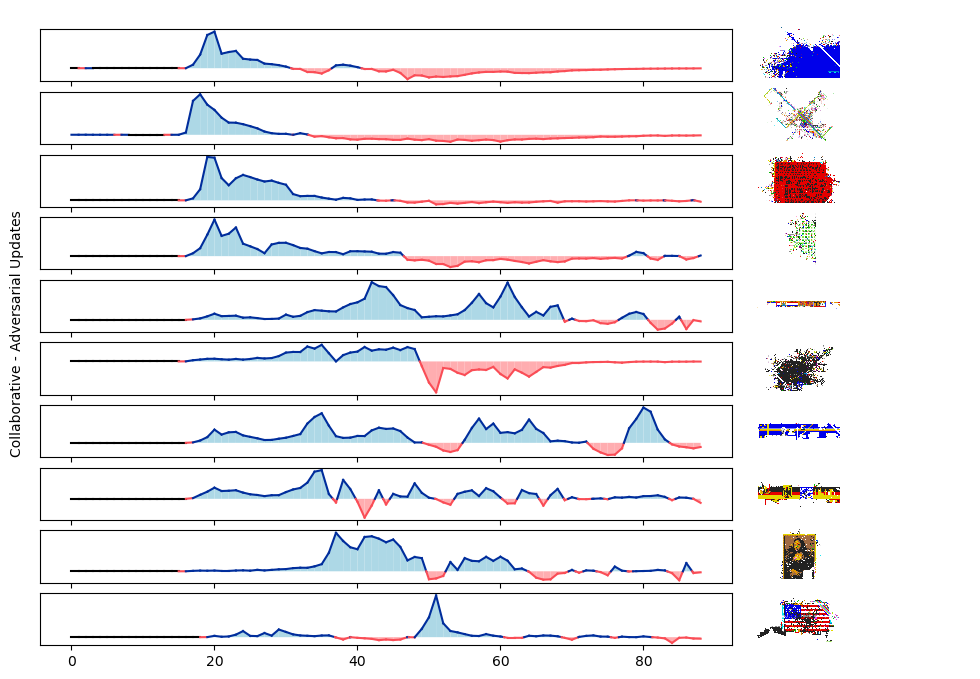

In [318]:
face_blue = '#add8e6'
face_red = '#FFADB0'
line_blue = '#002d9c'
line_red = '#fa4d56'
plot_time_pos(lst, face_red, face_blue,line_red,line_blue)

In [463]:
def get_diff_over_time_pos_and_neg(line, update_hours, update_pos):
    total_hours = 89
    pos_count = np.zeros(total_hours)
    neg_count = np.zeros(total_hours)
    drawing_up = make_drawing_update(line,update_pos)
    for pos in drawing_up:
        last_end = -1
        for update in drawing_up[pos]:
            if update == 0: continue
            st = update_hours[update][0]
            ed = update_hours[update][1]
            st_hour = convert_time(st)
            pos_count[st_hour] += 1
            if last_end != -1 and st != last_end:
                ed_hour = convert_time(last_end)
                neg_count[ed_hour] += 1
            last_end = ed
        if last_end != -1:
            ed_hour = convert_time(last_end)
            neg_count[ed_hour] += 1
    pos_count_dict = dict()
    neg_count_dict = dict()
    for i in range(0, len(pos_count)):
        pos_count_dict[i] = pos_count[i]
        neg_count_dict[i] = neg_count[i]
    return [pos_count_dict, neg_count_dict]

In [475]:
def plot_time_pos_neg(diff_over_time_dict_list):
    rows = len(diff_over_time_dict_list)
    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(rows, 2, width_ratios=[4, 1], wspace=0.15)
    for idx in range(len(diff_over_time_dict_list)):
        ax = fig.add_subplot(gs[idx, 0])

        pos_diff_over_time_dict = diff_over_time_dict_list[idx][0]
        neg_diff_over_time_dict = diff_over_time_dict_list[idx][1]
        pos_x = list(pos_diff_over_time_dict.keys())
        pos_y = list(pos_diff_over_time_dict.values())
        neg_x = list(neg_diff_over_time_dict.keys())
        neg_y = list(neg_diff_over_time_dict.values())
        neg_y = -np.array(neg_y)
        ax.plot(pos_x, pos_y, 'b-')
        ax.fill_between(pos_x,0, pos_y, facecolor='#add8e6')

        ax.plot(neg_x, neg_y, 'r-')
        ax.fill_between(neg_x,0, neg_y, facecolor='#FFADB0')
        ax.axhline(0, color='black', linewidth=1)
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax_image = fig.add_subplot(gs[idx, 1])
        img = Image.open("plots/"+str(idx)+".png")
        imgbox = OffsetImage(img, zoom=0.03)
        ab = AnnotationBbox(imgbox, (0, 0.5), frameon=False, box_alignment=(0.5, 0.5))
        ax_image.add_artist(ab)
        ax_image.axis('off') 

    # Adding labels and title
    fig.text(0.37, 0.04, 'Hours', va='center',fontsize=15)
    fig.text(0.1, 0.5, 'Collaborative vs. Adversarial Updates', va='center', rotation='vertical',fontsize=15)

    plt.show()

In [478]:
successful_num_set = {0,1,2,3,4,5,7,8,11,12}
unsuccessful_num_set = {0,1,2,3,9,14,29,30,34,35}
lst = []
with open("/home/yw180/place/data/merged_8/merge_user_emb/successful.csv", "r") as f:
    reader = csv.reader(f, delimiter=',')
    count = 0
    in_if = 0
    for line in reader:
        if count in successful_num_set:
            count += 1
            in_if += 1
            diff_over_time = get_diff_over_time_pos_and_neg(line, update_hours, update_pos)
            lst.append(diff_over_time)
        else:
            if in_if == 10:
                break
            count += 1

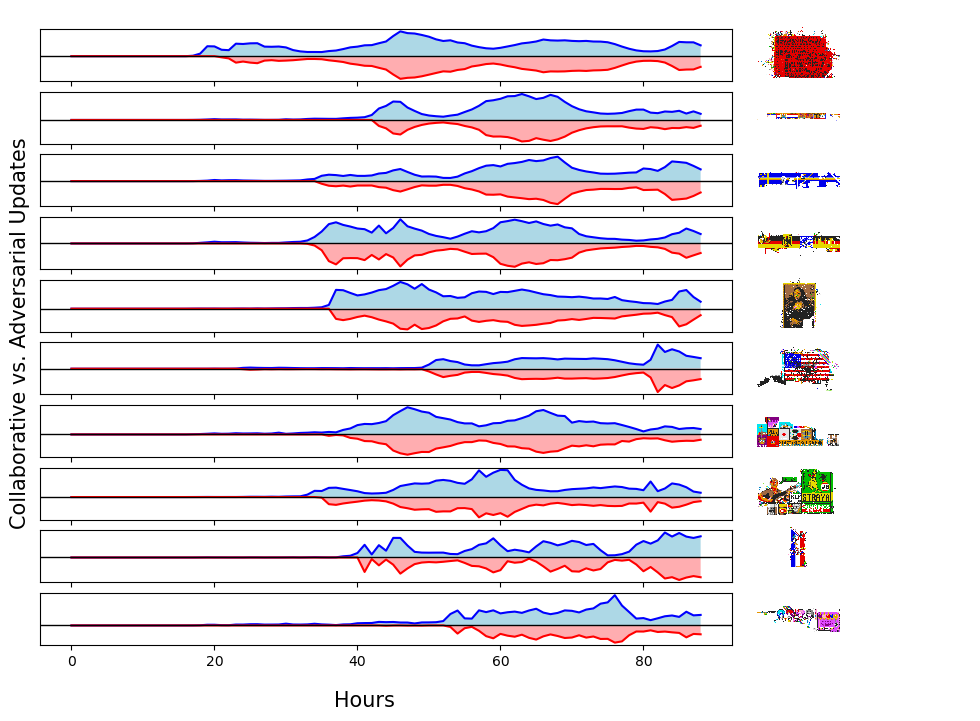

In [479]:
plot_time_pos_neg(lst)

In [410]:
def draw_annotation_img(line, update_hours, update_color, idx, max_hour = 0):
    hours_dict = dict()
    total_hours = 89
    for update in line:
        update = int(update)
        st = update_hours[update][0]
        ed = update_hours[update][1]
        end_hour = total_hours
        if ed != -1:
            end_hour = ed
        for i in range(st, end_hour):
            if i not in hours_dict:
                hours_dict[i] = 0
            hours_dict[i] += 1
    if max_hour == 0:
        max_hour = max(hours_dict, key=hours_dict.get)
    left = 1001
    right = 0
    top = 1001
    bottom = 0
    canvas = np.array(255*np.ones((1001,1001,3)),dtype='uint8')
    for update in line:
        update = int(update)
        st = update_hours[update][0]
        ed = update_hours[update][1]
        if ed == -1:
            ed = total_hours
        if st <= max_hour and ed > max_hour:
            x = update_color[update][0]
            y = update_color[update][1]
            color = update_color[update][2]
            if x < left:
                left = x
            if x > right:
                right = x
            if y < top:
                top = y
            if y > bottom:
                bottom = y
            canvas[y,x] = color
    canvas = canvas[top:bottom,left:right]
    
    plt.figure(frameon=False, figsize = (100,100))
    fig, a = plt.subplots()

    # a = fig.add_subplot(1, 2, 1)
    a.axis('off')

    # plt.imshow(in_image)
    # a.set_title('Original Image')
    # a = fig.add_subplot(1, 2, 2)

    plt.imshow(canvas)
    # a.set_title('Segmented Image')
    plt.savefig("plots/"+str(idx)+".png", dpi=400)

    plt.show()

    plt.clf()


In [199]:
code_to_rgb = {0: [255,255,255], 1: [228,228,228], 2: [136,136,136],\
        3: [34,34,34], 4: [255,167,209], 5: [229,0,0],\
            6: [229,149,0], 7: [160,106,66], 8: [229,217,0],\
        9: [148,224,68], 10: [2,190,1], 11: [0,229,240],\
               12: [0,131,199], 13: [0,0,234], 14: [224,74,255],\
           15: [130,0,128], 16: [220,220,220]}
def make_update_color(code_to_rgb):
    update_color = dict()
    with open("/scratch/yw180/place/data/sorted_tile_placements_idx.csv", "r") as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for line in reader:
            update = int(line[0])
            x = int(line[3])
            y = int(line[4])
            color = code_to_rgb[int(line[5])]
            update_color[update] = [x,y,color]
    return update_color

update_color = make_update_color(code_to_rgb)

<Figure size 10000x10000 with 0 Axes>

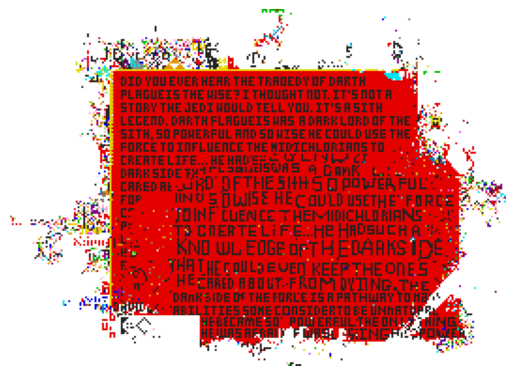

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

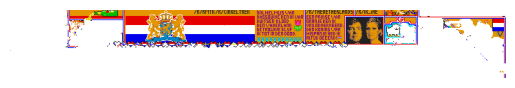

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

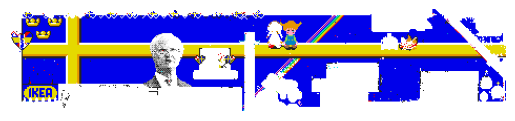

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

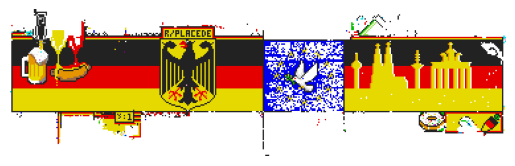

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

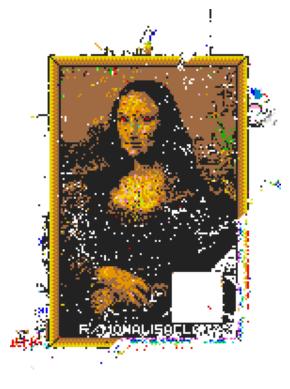

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

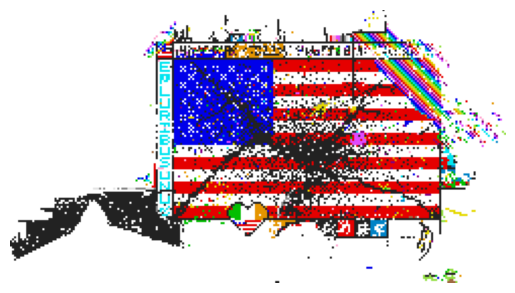

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

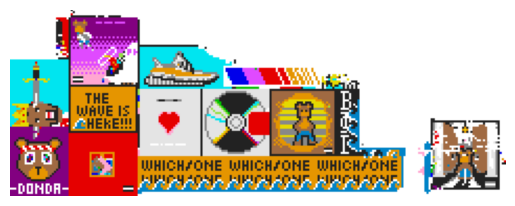

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

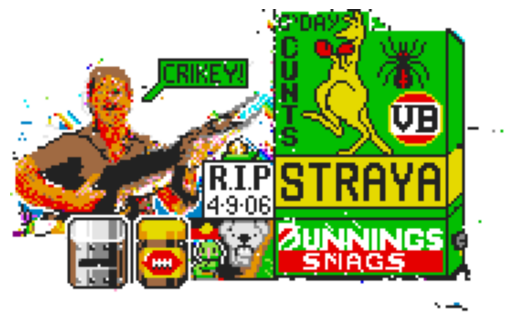

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

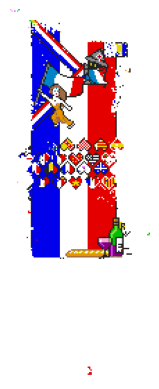

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

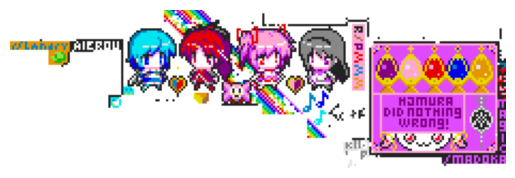

<Figure size 640x480 with 0 Axes>

In [477]:
with open("/home/yw180/place/data/merged_8/merge_user_emb/successful.csv", "r") as f:
    reader = csv.reader(f, delimiter=',')
    count = 0
    in_if = 0
    for line in reader:
        if count in successful_num_set:
            count += 1
            draw_annotation_img(line,update_hours_h,update_color,in_if,0)
            in_if += 1
        else:
            if in_if == 10:
                break
            count += 1

In [480]:
succ_negative_up = dict()
with open("/home/yw180/place/data/merged_8/merge_user_emb/successful.csv", "r") as f:
    reader = csv.reader(f, delimiter=',')
    line_count = 0
    for line in reader:
        diff_over_time = get_diff_over_time_pos_and_neg(line, update_hours, update_pos)[1]
        count = 0
        for i in diff_over_time:
            count += diff_over_time[i]
        succ_negative_up[line_count] = count
        line_count += 1
        
failed_negative_up = dict()
with open("/home/yw180/place/data/merged_8/merge_user_emb/unsuccessful.csv", "r") as f:
    reader = csv.reader(f, delimiter=',')
    line_count = 0
    for line in reader:
        diff_over_time = get_diff_over_time_pos_and_neg(line, update_hours, update_pos)[1]
        count = 0
        for i in diff_over_time:
            count += diff_over_time[i]
        failed_negative_up[line_count] = count
        line_count += 1

In [482]:
import pickle
succ_out = "/home/yw180/place/data/merged_8/merge_user_emb/succ_negative.pkl"
failed_out = "/home/yw180/place/data/merged_8/merge_user_emb/failed_negative.pkl"
with open(succ_out, "wb") as f:
    pickle.dump(succ_negative_up, f)
    
with open(failed_out, "wb") as f:
    pickle.dump(failed_negative_up, f)